<a href="https://colab.research.google.com/github/Snehaahh/Anomaly-Detection-using-ML/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import IsolationForest
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv("/content/machine_temperature_system_failure.csv", low_memory=False)
df.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [3]:
df.shape

(22695, 2)

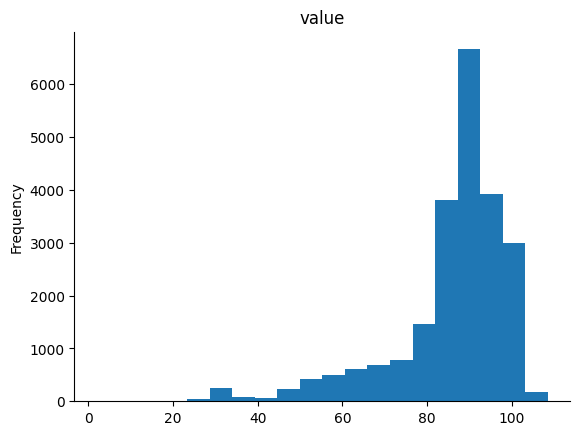

In [4]:
from matplotlib import pyplot as plt
df['value'].plot(kind='hist', bins=20, title='value')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
anomaly_points = [
    ["2013-12-10 06:25:00.000000","2013-12-12 05:35:00.000000"],
    ["2013-12-15 17:50:00.000000","2013-12-17 17:00:00.000000"],
    ["2014-01-27 14:20:00.000000","2014-01-29 13:30:00.000000"],
    ["2014-02-07 14:55:00.000000","2014-02-09 14:05:00.000000"]
]

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['anomaly'] = 0
df.head()

,timestamp,value,anomaly
0,2013-12-02 21:15:00,73.967322,0
1,2013-12-02 21:20:00,74.935882,0
2,2013-12-02 21:25:00,76.124162,0
3,2013-12-02 21:30:00,78.140707,0
4,2013-12-02 21:35:00,79.329836,0


In [7]:
for start, end in anomaly_points:
    df.loc[((df['timestamp'] >= start) & (df['timestamp'] <= end)), 'anomaly'] = 1

In [8]:
df['anomaly'].value_counts()

,count
anomaly,
0,20427
1,2268


In [9]:
# Extract date parts for potential use in time-series feature engineering
df['year'] = df['timestamp'].apply(lambda x : x.year)
df['month'] = df['timestamp'].apply(lambda x : x.month)
df['day'] = df['timestamp'].apply(lambda x : x.day)
df['hour'] = df['timestamp'].apply(lambda x : x.hour)
df['minute'] = df['timestamp'].apply(lambda x : x.minute)

In [10]:
df.head()

,timestamp,value,anomaly,year,month,day,hour,minute
0,2013-12-02 21:15:00,73.967322,0,2013,12,2,21,15
1,2013-12-02 21:20:00,74.935882,0,2013,12,2,21,20
2,2013-12-02 21:25:00,76.124162,0,2013,12,2,21,25
3,2013-12-02 21:30:00,78.140707,0,2013,12,2,21,30
4,2013-12-02 21:35:00,79.329836,0,2013,12,2,21,35


In [11]:
df.index = df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)

In [12]:
iforest_model = IsolationForest(n_estimators=300, contamination=0.1, max_samples=700)

In [13]:
iforest_ret = iforest_model.fit_predict(df['value'].values.reshape(-1, 1))
print(iforest_ret)

[1 1 1 ... 1 1 1]


In [14]:
iforest_df = pd.DataFrame()
iforest_df['value'] = df['value']
iforest_df['anomaly']  = [1 if i==-1 else 0 for i in iforest_ret]

In [15]:
iforest_df.head()

,value,anomaly
timestamp,,
2013-12-02 21:15:00,73.967322,0
2013-12-02 21:20:00,74.935882,0
2013-12-02 21:25:00,76.124162,0
2013-12-02 21:30:00,78.140707,0
2013-12-02 21:35:00,79.329836,0


In [16]:
iforest_df['anomaly'].value_counts()

,count
anomaly,
0,20426
1,2269
